In [11]:
import numpy as np
from sympy import *
from scipy.stats import *

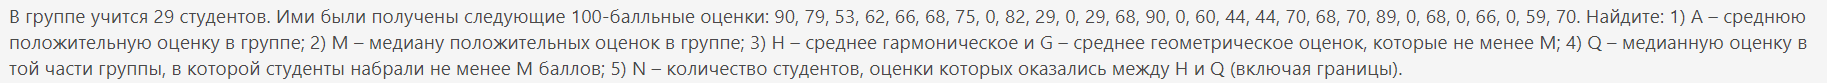

In [14]:
#marks = np.array([90, 79, 53, 62, 66, 68, 75, 0, 82, 29, 0, 29, 68, 90, 0, 60, 44, 44, 70, 68, 70, 89, 0, 68, 0, 66, 0, 59, 70])
def f1(marks):
    A = [i for i in marks if i > 0]
    M = np.median(A)
    H = len([i for i in A if i >= M])/sum(1/i for i in A if i >= M)
    G = gmean([i for i in A if i >= M])
    Q = np.median([i for i in A if i >= M])
    N = len([i for i in marks if Q<=i<=H])
    print(f'средняя положительная оценка: {np.mean(A)}', f'M - медиана полож. оценок: {M}', f'H - среднее гармоническое: {H}',
          f'G - среднее геометрическое: {G}', f'Q-медианная оценка, где студенты набрали нее менее М: {Q}', 
          f'N - количество студентов (оценки между H и Q): {N}', sep='\n')
#f1(marks)

In [15]:
f1(np.array([38, 17, 17, 86, 0, 80, 80, 82, 71, 59, 72, 70, 70, 88, 82, 0, 59, 2, 100, 66, 91, 0, 0, 84, 73, 91]))

средняя положительная оценка: 67.18181818181819
M - медиана полож. оценок: 72.5
H - среднее гармоническое: 84.63934323820307
G - среднее геометрическое: 84.9086933339043
Q-медианная оценка, где студенты набрали нее менее М: 84.0
N - количество студентов (оценки между H и Q): 1


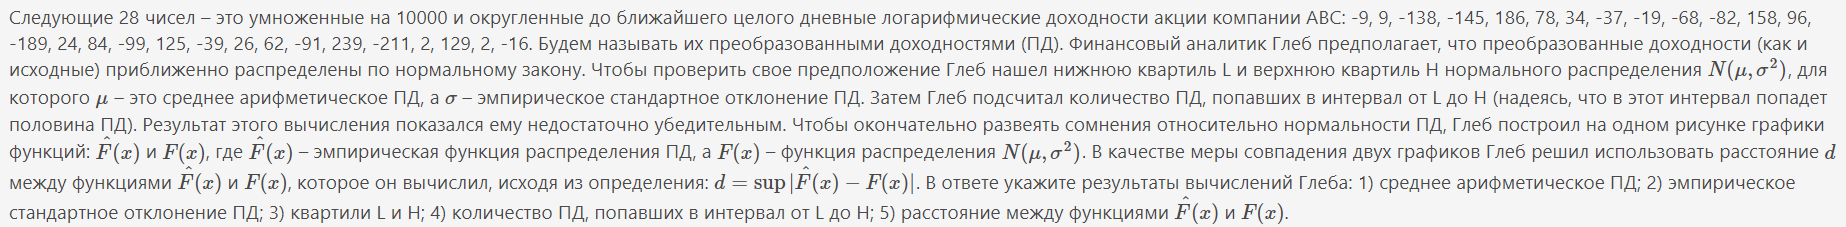

In [24]:
import statsmodels.api as sm 
def f2(abc):
    abc = np.array(abc)
    mu = np.mean(abc)
    sigma = abc.std()
    X = norm(mu, sigma)
    L = X.ppf(0.25)
    H = X.ppf(0.75)
    kol = len([i for i in abc if L<i<H])
    ecdf = sm.distributions.ECDF(ABC)
    d_max = 0
    for x in ABC:
        d = abs(ecdf(x) - X.cdf(x))
        if d > d_max:
            d_max = d
    print(f'ср. арифметическое: {mu}', f'эмп. ст. отклонение: {sigma}', f'квартили L: {L}', f'H: {H}',
        f'количество ПД, попавших в интервал от L до H: {kol}', f'максимальное расстояние между функциями: {d_max}', sep='\n')

In [25]:
f2(np.array([-9, 9, -138, -145, 186, 78, 34, -37, -19, -68, -82, 158, 96, -189, 24, 84, -99, 125, -39, 26, 62, -91, 239, -211, 2, 129, 2, -16]))

ср. арифметическое: 3.9642857142857144
эмп. ст. отклонение: 108.64966048952843
квартили L: -69.31879664818541
H: 77.24736807675683
количество ПД, попавших в интервал от L до H: 13
максимальное расстояние между функциями: 0.0696743693255657


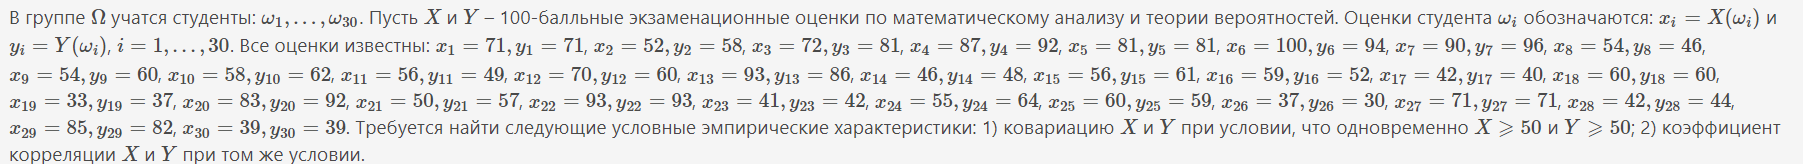

In [36]:
def f3(xy):
    xy = xy.replace('\n', '').split(',')
    lst = []
    lx, ly = [], []
    for i in range(len(xy)):
        lst.append(int(xy[i].split('=')[1].strip()))
    for j in range(0,len(lst),2):
        if lst[j] >= 50 and lst[j+1] >= 50:
            lx.append(lst[j])
            ly.append(lst[j+1])
    print(f'cov: {np.cov(np.array(lx), np.array(ly), bias=True)[0][1]}', 
          f'corr: {np.corrcoef(np.array(lx), np.array(ly))[0][1]}', sep='\n')

In [37]:
f3('x1=69,y1=61, x2=72,y2=58, x3=51,y3=55, x4=33,y4=41, x5=83,y5=83, x6=77,y6=88, x7=98,y7=91, x8=42,y8=34, x9=58,y9=60, x10=53,y10=44, x11=41,y11=52, x12=91,y12=94, x13=66,y13=77, x14=69,y14=68, x15=33,y15=30, x16=58,y16=68, x17=41,y17=43, x18=45,y18=32, x19=62,y19=49, x20=75,y20=73, x21=53,y21=49, x22=100,y22=98, x23=71,y23=70, x24=61,y24=49, x25=88,y25=75, x26=80,y26=87, x27=66,y27=65')

cov: 148.19377162629755
corr: 0.8477609742508937


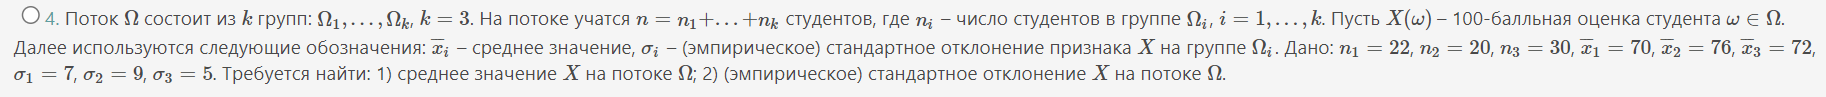

In [5]:
def f4(n1, n2, n3, x1s, x2s, x3s, sgm1, sgm2, sgm3):
    n1, n2, n3 = 23, 27, 22
    x1s, x2s, x3s = 76, 73, 75
    sgm1, sgm2, sgm3 = 9, 3, 6
    Xs = (n1*x1s + n2*x2s + n3*x3s)/(n1+n2+n3)
    sigma_m = 1/(n1+n2+n3) * (n1*(x1s - Xs)**2 + n2*(x2s - Xs)**2 + n3*(x3s - Xs)**2)
    sigma_v = (n1*sgm1**2 + n2*sgm2**2 + n3*sgm3**2)/(n1+n2+n3)
    sigma = (sigma_m + sigma_v)
    stdot = sigma**(0.5)
    return Xs, stdot

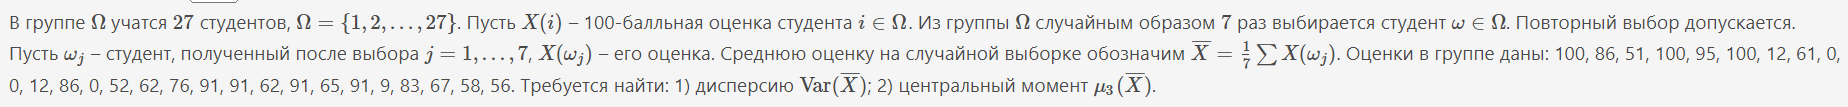

In [47]:
marks = [0, 71, 71, 39, 84, 18, 100, 89, 71, 84, 16, 62, 33, 98, 20, 88, 74, 80, 28, 66, 55, 72, 0, 70, 13]
def f5(marks, n):
    return np.var(marks)/n, moment(marks, 3)/n**2

In [48]:
f5(np.array(marks),8)

(118.0392, -207.0299339999999)

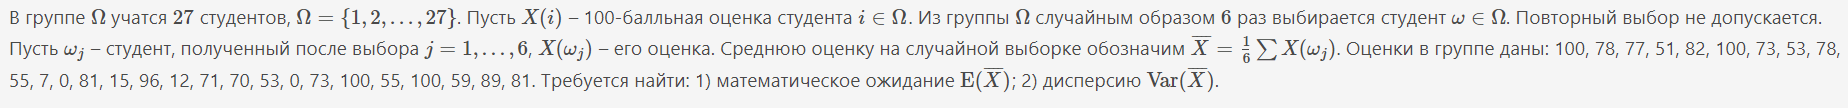

In [49]:
def f6(marks,N, n):
    return np.mean(marks), np.var(marks)/n * (N - n )/(N - 1)

In [50]:
f6([100, 78, 77, 51, 82, 100, 73, 53, 78, 55, 7, 0, 81, 15, 96, 12, 71, 70, 53, 0, 73, 100, 55, 100, 59, 89, 81],27, 6)

(63.2962962962963, 128.00242692835283)

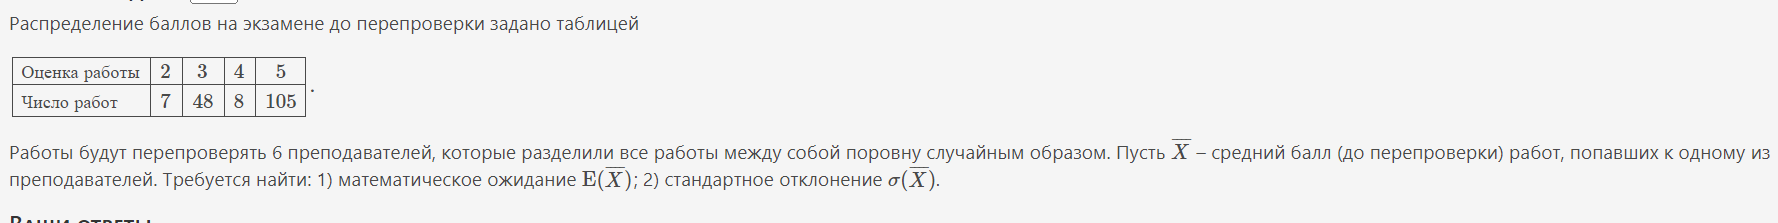

In [67]:
def f7(N,pr, n1, n2, n3, n4): 
    n = N/pr
    lst = np.array([2]*n1 + [3]*n2 + [4]*n3 + [5]*n4)
    m = np.mean(lst)
    v = np.var(lst)/n * (N-n)/(N-1)
    return m, v**(.5)

In [68]:
f7(24+60+55+11,6, 24, 60, 55, 11)

(3.3533333333333335, 0.15273299458889839)

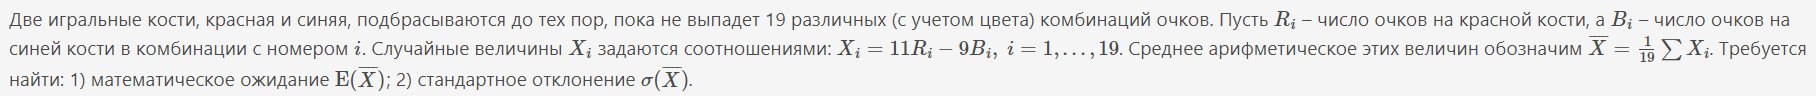

In [55]:
def f8(N,n):
    EX = 11*1/6*sum(range(1,7)) + (-9)*1/6*sum(range(1,7))
    Varx = (1/6*sum(list(i**2 for i in range(1,7))) - (1/6*(sum(range(1,7))))**2) 
    VarX = (N-n)/(N-1)/n * (11**2 * Varx + 9**2 *Varx)
    return EX, VarX**(.5)

In [56]:
f8(36, 19)

(7.0, 3.880902409076003)

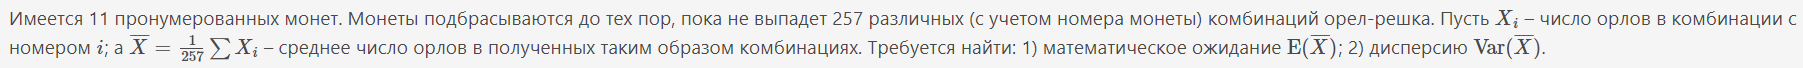

In [65]:
def f9(coins,n):
    EX = coins * 0.5 
    Varx = 1/2 - (1/2)**2
    VarX = coins *Varx * (1/n) * (2**coins - n)/(2**coins - 1)
    return EX, VarX

In [66]:
f9(10, 215)

(5.0, 0.009195480688353906)

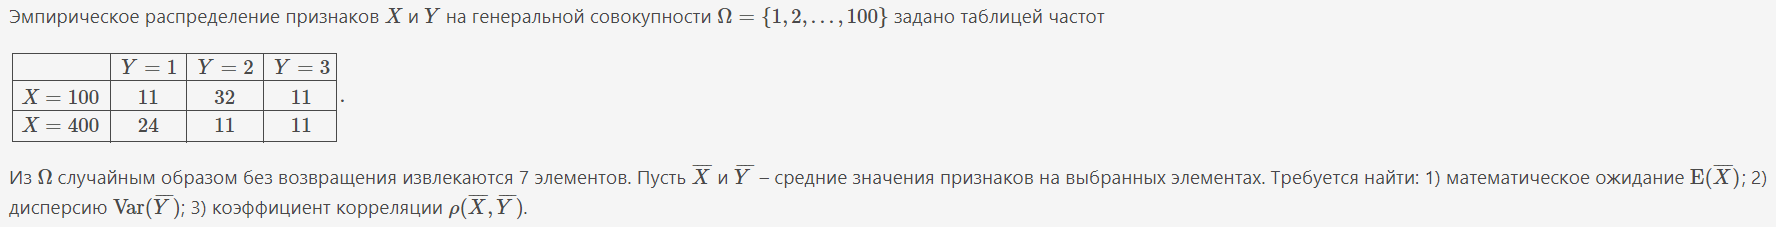

In [64]:
def f11(arr: list, x: list, y: list, n: int, N: int):
    X = np.array([x, [sum(arr[0]), sum(arr[1])]])
    Y = np.array([y, [sum(arr[:, 0]), sum(arr[:, 1]), sum(arr[:, 2])]])
    
    X_d = rv_discrete(values=(X[0], X[1]))
    Y_d = rv_discrete(values=(Y[0], Y[1]))
    
    EX = X_d.mean()
    Var_X = X_d.var()/n * (N - n)/(N - 1)
    
    EY = Y_d.mean()
    Var_Y = Y_d.var()/n * (N - n)/(N - 1)
    
    EXY = 0
    for i in range(len(x)):
        for j in range(len(y)):
            EXY += x[i] * y[j] * arr[i, j]
    CovXY = (EXY - EX*EY)/n * (N - n)/(N - 1)
        
    Corr = (EXY - EX*EY) / ((X_d.var())**0.5 * (Y_d.var())**0.5)
    return f'EX = {(EX)}\nVar_Y = {(Var_Y)}\nCorr = {(Corr)}\n------\nEY = {(EY)}\nSigma_X = {(Var_X**0.5)}\nCov_XY = {(CovXY)}'

matr = np.array([
    [21, 17, 12],
    [10, 27, 13]
], dtype=float)
matr *= 0.01
x_ = [100, 300]
y_ = [1, 2, 4]

print(f11(matr, x_, y_, 6, 100))

EX = 200.0
Var_Y = 0.20159360269360246
Corr = 0.11517963117237515
------
EY = 2.1900000000000004
Sigma_X = 39.78054276265701
Cov_XY = 2.057239057239048
